# <center> System of Billiard  Balls </center>
##  <center> Event Based Algorithm </center>


#### We will try to simulate isolated system of  Hard-disks or Spheres colliding with each other elastically(and bouncing off from the walls using Newton's laws. This algorithm is used in Molecular Dynamics Simulation. we will simulate such system of flat disks on computer and check for time reversal symmetry which i will explain later.

#### Let's get started 

Consider an isolated snooker table with N non interacting billiard balls that you place in vacuum so that it doesn't interact with environment.Giving some initial velocities and positions of these balls we want to know what's there position and velocity at later instant.Let me specify first how we are gonna evolve this system on Computer



1. We will consider system of flat disks(2D) with some radius with no interaction between them. so they will only possess kinetic energy
2. Next we will provide some initial positions and velocities to these flat disks and see how it evolves.But how are we gonna evolve it ? thats what I am gonna discuss in this notebook 

For evolving the system of hard-disks,The event based algorithm is used where given the initial configuration, we calculate two types of $times$ and how velocity gets modified in these two conditions  



##### <u>Wall Collision Time</u> - It is the time  that  disk takes  to collide with the  walls .
consider the following figure that i created in *draw.io*

![Alt](https://github.com/SachinGupta7/Event-driven-collison/blob/master/P1/Event1.png?raw=true)

Let's take an example of a disk, which  is trapped in a 2D box and our four observers(A,B,C,D) calculate the time taken by flat disk to collide  with their respective walls. It is to be noted that while calculating Wall Time  we only need to consider maximum two walls i.e. only two observer work at a given instant for a disk because in 2-dimension you can't have a disk which moves in 3 directions :), if you can then please let me know !!!!


Let say we start our system at $t = T0$ . then looking the arrow inside the disk at that instant we can see it will either hit  wall C or wall D. 

If at $T0$ disk's  coordinate = (x0,y0) and velocity = (vx,vy) , we can calculate  two times (taking Box Length to be L and disk radius to be R)
$$t_c = \frac{L-x_0-R}{v_x} $$ and $$ t_d = \frac{y_0-R}{v_y}$$



and formula of time with others walls can be calculated similarly.

in this example we see that at $T1$ it hits the wall C which means we must have $t_c<t_d$ (it's just an example)

after evolving the system till $t_c = T1-T0$ we have to see how the velocity of the disk will get changed after it bounces back from the wall

- we evolve it's position freely till $T1$ by 
$$ \vec{x}(t_c) = \vec{x}(T0) +\vec{v}(t_c)$$


- Since disk just bounces  off from the wall (reflected) so we just need to reverse the sign of perpendicular component of velocity to the wall. In this case (wall C) it is $v_x$ therefore $ v_x(t_c) = -v_x(t0)$ and the $y^{th}$ component will remain unchanged. Similarly you can find how  velocity changes after colliding with different walls.

##### <u>Pair Collision Time</u> - which is the collision time between two disks  
Suppose we have to calculate pair collision time  between $i^{th}$ and $j^{th}$ disks.whose position and velocity are ($\vec{r_i}$ , $\vec{v_i}$) , ($\vec{r_j}$ , $\vec{v_j}$ )respectively.


If you sit at the  center of $i^{th}$ disk you will  see $j^{th}$ disk center at $\vec{r} = \vec{r_j}-\vec{r_i}$ moving with $\vec{v} = \vec{v_j}-\vec{v_i}$ 

![Alt](https://github.com/SachinGupta7/Event-driven-collison/blob/master/pair_time.jpg?raw=true)
condition for collision between this pair is 

\begin{align}
2\vec{R} = \vec{r} +\vec{v} \Delta t
\end{align}


taking dot product at both ends
$$\implies v^2\Delta t ^2 +2(\vec{v}.\vec{r})\Delta t+r^2-4R^2 =  0$$

the appropiate roots of the equation gives 
$$\Delta t = - \bigg (\frac{\vec{v}.\vec{r} + \sqrt{ (\vec{v}.\vec{r})^2-v^2(r^2-4R^2)}}{v^2} \bigg )$$


clearly $ (\vec{v}.\vec{r})^2-v^2(r^2-4R^2) >0$ *cuz we want real and positive time !!!*

So that's the formula for the time. Now the question is how do we change their velocity after they collide  ??


for this we shift to the center of mass frame. If we take masses of two disks to be same then center of mass of the two disks moves with velocity $$\vec{V_c} = \frac{\vec{v_i}+\vec{v_j}}{2}$$ Therefore it is good to  find our velocity in lab frame($\vec{v_i},\vec{v_j}$) in terms of relative velocity and COM velocity.we get 

\begin{align}
\vec{v_i} = \vec{V_c} - \frac{\vec{v}}{2}
\end{align}

\begin{align}
\vec{v_j} = \vec{V_c} +\frac{\vec{v}}{2}
\end{align}



since $\vec{V_c}$ does not change during collision therefore change in velocity of the disks due to collision is given by 


\begin{align*}
\Delta\vec{v_i} = -\frac{\Delta\vec{v}}{2}
\end{align*}

\begin{align*}
\Delta\vec{v_j} = + \frac{\Delta\vec{v}}{2}
\end{align*}


since there is no force between the disks and they collide elastically. Therefore component of relative velocity $\vec{v}$ along the separation vector $\vec{r}$ is just  <b><i>reflected </b></i> about $\vec{r}$. 




![Alt](https://github.com/SachinGupta7/Event-driven-collison/blob/master/pair_time_23.png?raw=true)

using momentum conservation it is easy to show that along $\vec{r}$
$$\Delta \vec{v} = -2(\vec{v}.\hat{r})\hat{r}$$

where $\hat{r}$ is a unit vector along $\vec{r}$.

then from $eq(8) \ \  and \ \ (9) $ 

\begin{align}
\vec{v_i}^{'} = \vec{v_i} +(\vec{v}.\hat{r})\hat{r}
\end{align}

\begin{align}
\vec{v_j}^{'} = \vec{v_j}  -(\vec{v}.\hat{r})\hat{r}
\end{align}

where $\vec{v_i}^{'} $ and $\vec{v_j}^{'}$ are the final velocities of disks . That's what we wanted.😪

-----------------------------------------------------------------------------------------



Let me explain in brief how we can implement this on computer 

> Given some initial configuration. Two types of time is calculated. i.e. *wall time* for each ball and if you take  N balls then you will have to compute *pair collision time*  for each pair

> The  minimum of these time will give  the next event. 

> Evolve the system freely till this next event

> change the velocities according to the type of *next event*  i.e. whether it's wall time or pair time 

> The next state obtained will form new configuration and we do it all again :)

--------------------------------------------------------------

### <center> Evolving System of Disks Using Event Based Algorithm </center> 


In this code I will first create a system of N disks enclosed in a 2D box.Then by giving them some  initial configuration(positions and velocity) i will calculate next event time and evolve the  system till that next event.and repeat and repeat :(  


## How to write code:

1. Calculate the radius of the circular disk by defining length of the 2_D box and density(area of all disks/total area) 
 
2. Initialize the position and velocity configuration using numpy array for example if you have three particle on a plane then you have to construct two arrays of the type 


> position_array = np.array([($x1,y_1$),($x_2,y_2$),($x_3,y_3$)])
 
 
> velocity_array = np.array([($Vx_1,Vy1$),($Vx_2,Vy_2$),($Vx_3,Vy_3$)])

3. Then put reasonable  initial value of positions and velocities such that disks don't overlap
4. calculate shortest time using algorithm and append the Positions and velocities
5. For plotting disks and adding $cool$ arrow(it will tell you about directions too) inside it, plz go through the following code  


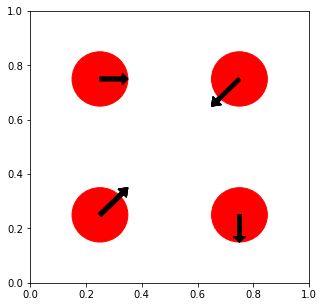

In [9]:
import matplotlib.pyplot as plt  ##importing liraries
import matplotlib.patches as pt
import numpy as np

N =4 ##total disks
position = np.array([(0.25,0.25),(0.75,0.25),(0.25,0.75),(0.75,0.75)]) 
velocities = np.array([(1,1),(0,-1),(1,0),(-1,-1)]).reshape(4,2)
radius = 0.5

######creatning figure
fig,ax = plt.subplots(figsize = (5,5))
ax.set_xlim([0,1])
ax.set_ylim([0,1])

##plotting circles and arrow
for x,y in position:
    PP = pt.Circle((x,y),radius = 0.1,color = 'r')
    ax.add_patch(PP)
    for i in range(4):
        QQ = pt.Arrow(position[i,0],position[i,1],0.1*velocities[i,0],0.1*velocities[i,1],width = 0.07,color = 'k')
        ax.add_patch(QQ)
plt.show() 


# <center> Python Code </center>


Run Code on cloud $\rightarrow$ [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SachinGupta7/Event-driven-collison.git/master?filepath=%2Fevent_based_sim_code.ipynb)
#### <center> OR </center>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17XdxuE0ofdPgFOxcywW2cUhKkRckNvE7#scrollTo=DQoGNPev_3la&line=137&uniqifier=1)


#### In the cell below i am gonna plot the configuration of N disk at different instant. Please Note that arrow only represent the direction and scaled magnitude of the velocity

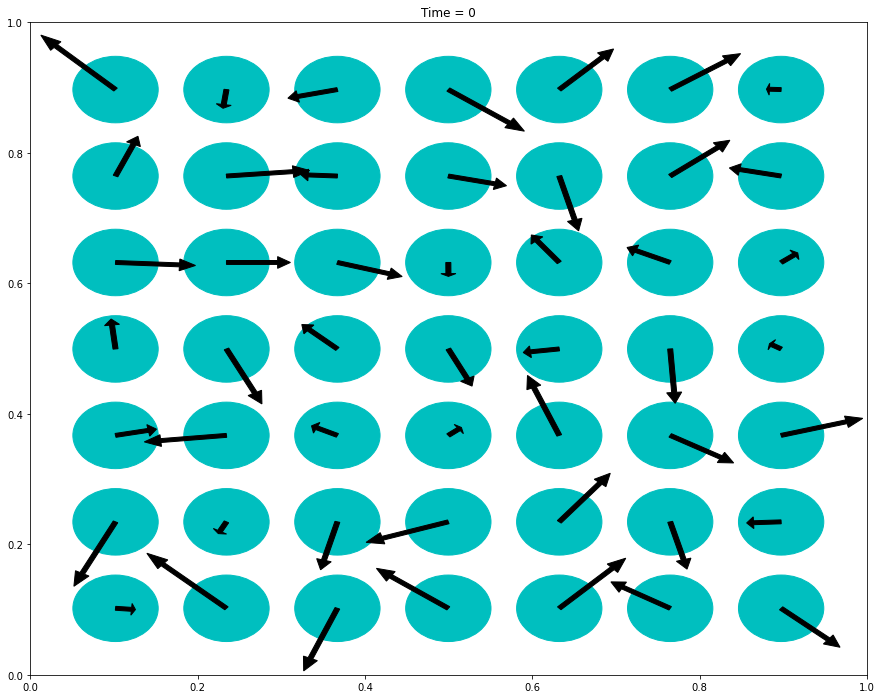

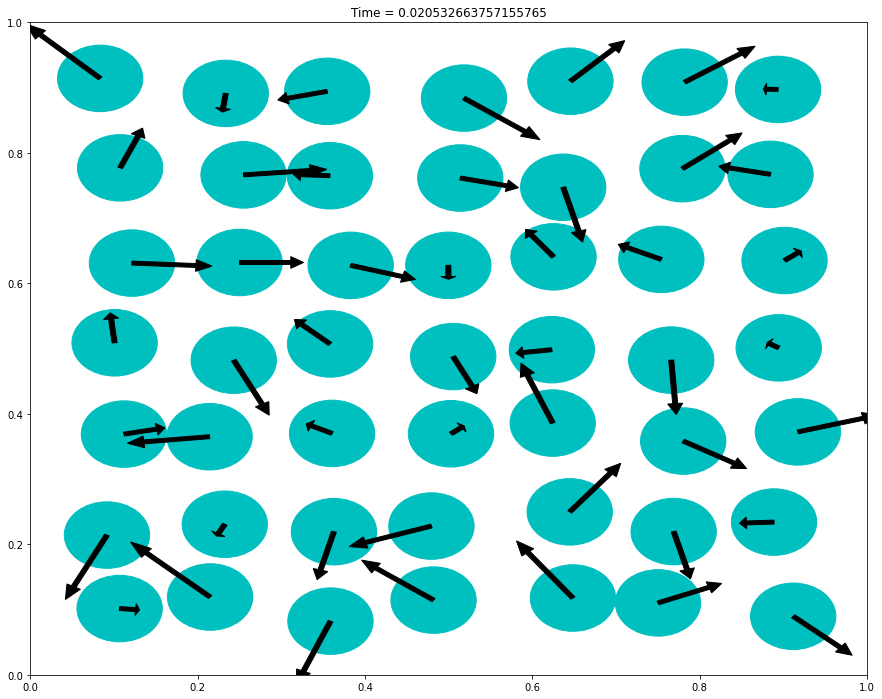

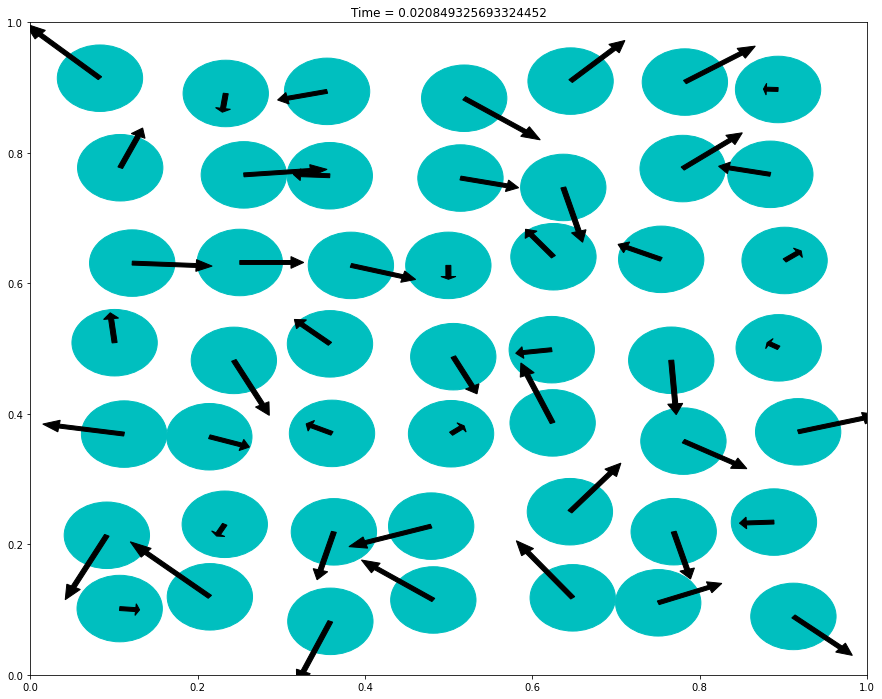

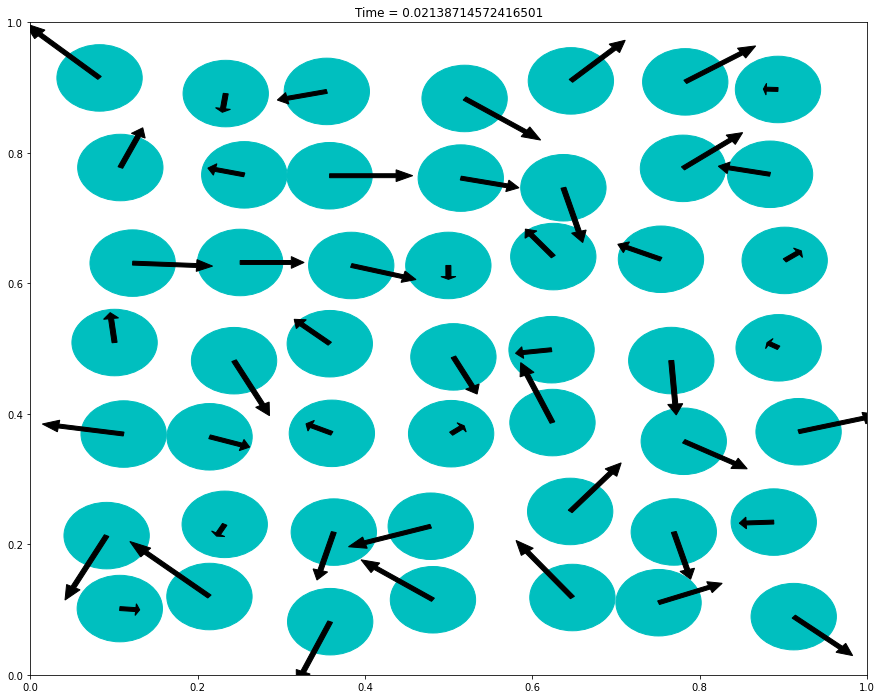

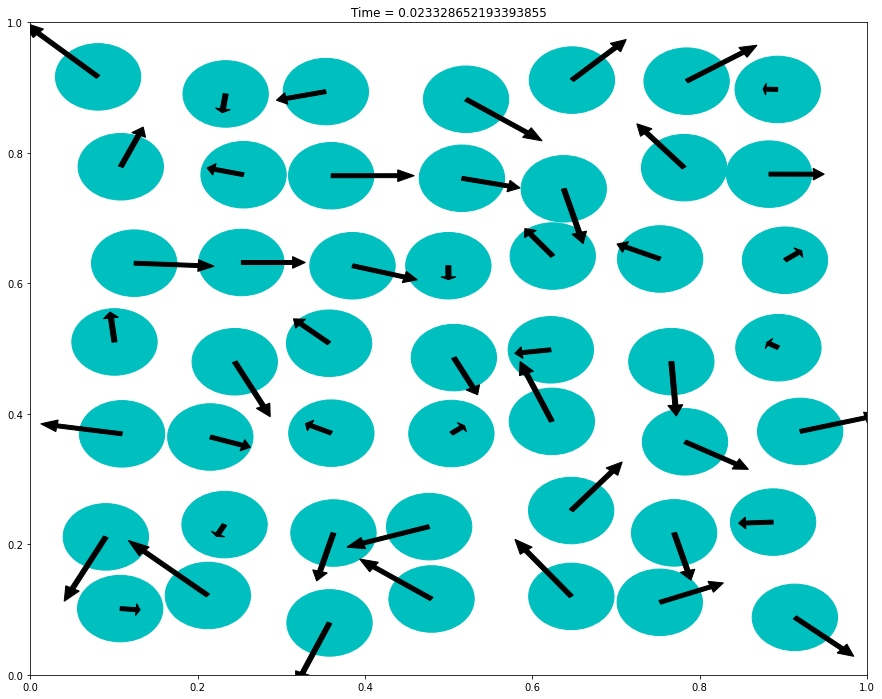

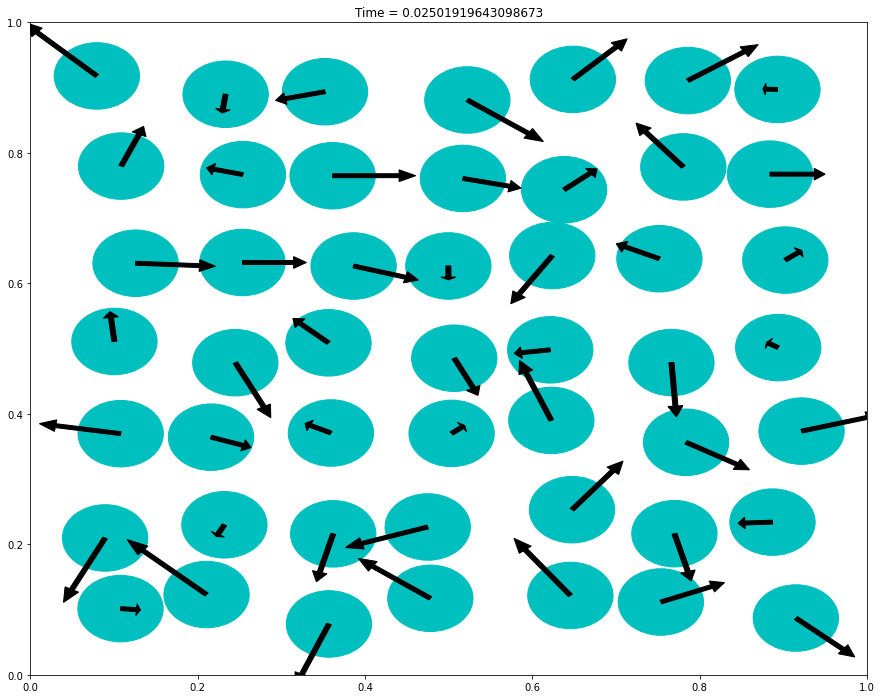

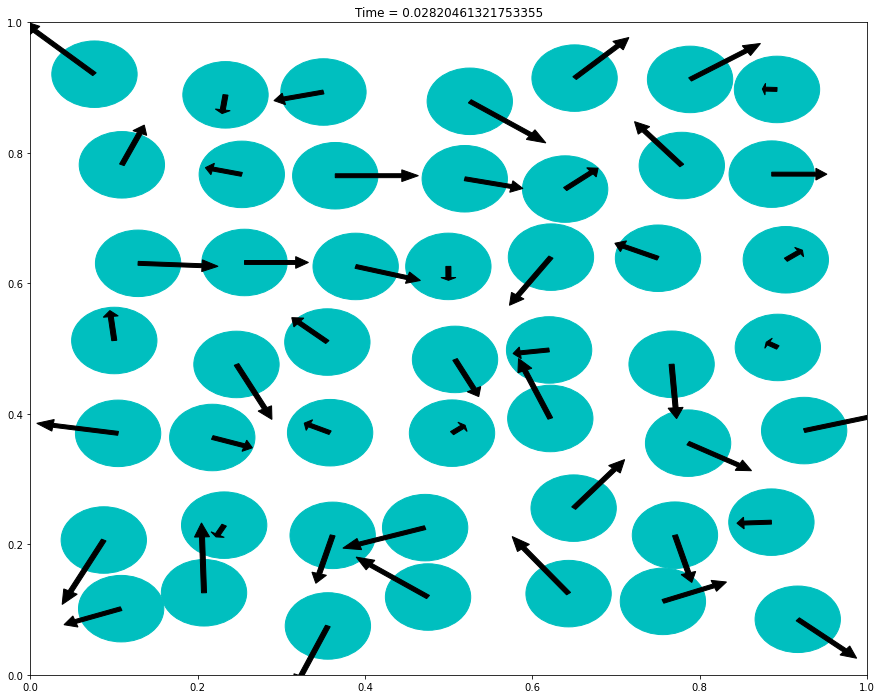

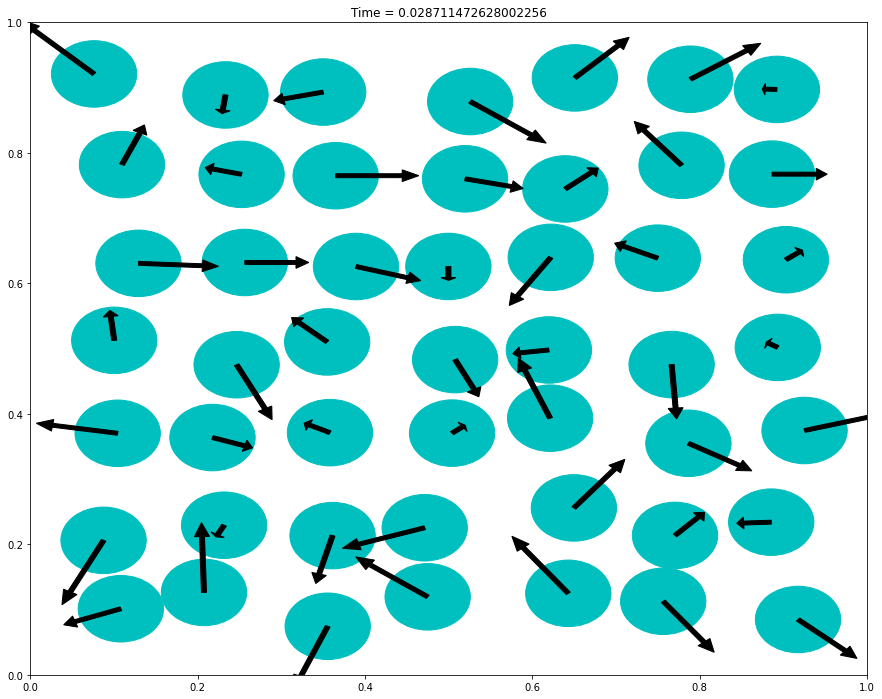

In [19]:
############## Event-DRIVEN COLLISIONS ####################################
###########################################################################

#### This Program simulates the motion of four atoms in a 2D box ######
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pt







#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad,L_box):  
    if velcomp > 0.0:
        del_t = (L_box - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of atoms to collide. 
# pos1 and pos2 are positions of atoms 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the atoms. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


##########################################################################


######################### Initialization #################################


N = 7  ## we will take N*N atoms  
Natoms = N*N
spac = 2.6 ##adjusting spacebetween disks so they don't overlap or touch the wall
rho = 0.4
velocities = np.random.uniform(low = -1.0,high = 1.0 ,size = (N*N,2))
L_box= 1

Ratom = np.sqrt((rho*L_box*L_box)/(Natoms*np.pi))  ##calculating radius of atoms


##creatiing position lattice
pos = np.array([],dtype = float)
for i in range(0,N):
    for j in range(0,N):

        pos = np.append(pos,((2+i*spac)*Ratom,(2+j*spac)*Ratom))

positions = pos.reshape(Natoms,2) 

##i am separately collecting x and y coordinate of each disk
## i will use them in simulation part
X_coordinate = np.array(positions[:,0]) 
Y_coordinate = np.array(positions[:,1])

#####################33

##creating figure and arrows

fig1a,ax = plt.subplots(figsize = (15,12))
ax.set_xlim([0,L_box])
ax.set_ylim([0,L_box])
t = 0##initial time
ax.set_title("Time = "+str(t))

for x,y in positions:
    PP = pt.Circle((x,y),radius = Ratom,color = 'c')
    ax.add_patch(PP)
for i in range(N*N):
    QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.03,
                  color = 'k')
    ax.add_patch(QQ)
plt.show()

######################################33



n_events = 7 # selecting number of events you can change it also
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] ##tabulating all pair possible







############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom,L_box) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  ##findig minimum of all time

    for i in range(Natoms):
        positions[i] += velocities[i]*abs(next_iter) # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
    t+=next_iter
    ##plotting configurations at different instant
    fig,ax = plt.subplots(figsize = (15,12))
    ax.set_xlim([0,L_box])
    ax.set_ylim([0,L_box])
    ax.set_title("Time = "+str(t))
    for x,y in positions:
        PP = pt.Circle((x,y),radius = Ratom,color = 'c')
        ax.add_patch(PP)

    for i in range(N*N):
        QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],
                      width = 0.03,color = 'k')
        ax.add_patch(QQ)
    plt.show()
    
    X_coordinate = np.vstack((X_coordinate, positions[:,0])) ##stacking new x and y coordinates
    Y_coordinate = np.vstack((Y_coordinate, positions[:,1]))
    ####################






## <center> Simulation Part </center>

Run Code on cloud $\rightarrow$ [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SachinGupta7/Event-driven-collison.git/master?filepath=%2Fevent_based_sim_code.ipynb)
#### <center> OR </center>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17XdxuE0ofdPgFOxcywW2cUhKkRckNvE7#scrollTo=DQoGNPev_3la&line=137&uniqifier=1)

In [18]:
import ipyvolume as ipv  ##library forrendering 3d figures
ipv.figure()
ipv.clear()
  
Z = np.zeros(N*N) ##taking z coordinate same because so that each disk lie on a plane
s = ipv.scatter(X_coordinate, Y_coordinate, Z, marker='sphere', size=200*Ratom,color = 'cyan')
ipv.animation_control(s,interval = 1) # shows controls for animation controls
ipv.show()